## k-means, iris

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer

r_seed = 2022

In [4]:
iris = pd.read_csv('./datasets/Iris.csv')

In [5]:
iris.shape

(150, 6)

In [6]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df = iris.iloc[:, 1:3]

In [15]:
df.head()

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [16]:
ss = StandardScaler()
df = ss.fit_transform(df)

In [18]:
df[:10]

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019],
       [-0.53717756,  1.95766909],
       [-1.50652052,  0.80065426],
       [-1.02184904,  0.80065426],
       [-1.74885626, -0.35636057],
       [-1.14301691,  0.10644536]])

In [22]:
km = KMeans(3)
km.fit(df)  # 비지도 학습이라 y 값 없음

KMeans(n_clusters=3)

In [27]:
pred = km.predict(df)

In [28]:
df_temp = pd.DataFrame(df)
df_temp.head()

df_temp['cluster'] = pred
df_temp.head()

,0,1,cluster
0,-0.900681,1.032057,2
1,-1.143017,-0.124958,2
2,-1.385353,0.337848,2
3,-1.506521,0.106445,2
4,-1.021849,1.263460,2


In [30]:
df_temp['Species'] = iris['Species']
df_temp.head()

,0,1,cluster,Species
0,-0.900681,1.032057,2,Iris-setosa
1,-1.143017,-0.124958,2,Iris-setosa
2,-1.385353,0.337848,2,Iris-setosa
3,-1.506521,0.106445,2,Iris-setosa
4,-1.021849,1.263460,2,Iris-setosa


In [34]:
# Label Encoding
le = LabelEncoder()
df_temp['Species'] = le.fit_transform(df_temp['Species'])

# 0, 1, 2

In [35]:
df_temp.head()

,0,1,cluster,Species
0,-0.900681,1.032057,2,0
1,-1.143017,-0.124958,2,0
2,-1.385353,0.337848,2,0
3,-1.506521,0.106445,2,0
4,-1.021849,1.263460,2,0


In [36]:
df_temp.columns = ["A", "B", "C", "S"]
df_temp

,A,B,C,S
0,-0.900681,1.032057,2,0
1,-1.143017,-0.124958,2,0
2,-1.385353,0.337848,2,0
3,-1.506521,0.106445,2,0
4,-1.021849,1.263460,2,0
...,...,...,...,...
145,1.038005,-0.124958,1,2
146,0.553333,-1.281972,0,2
147,0.795669,-0.124958,1,2
148,0.432165,0.800654,1,2


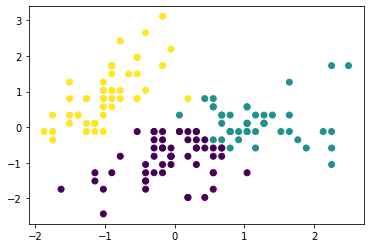

In [38]:
plt.scatter(df_temp['A'], df_temp['B'], c = df_temp['C'])
plt.show()

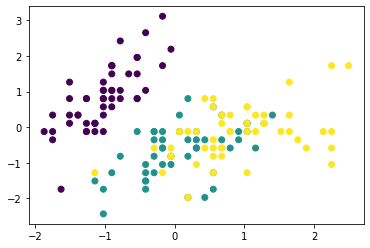

In [39]:
plt.scatter(df_temp['A'], df_temp['B'], c = df_temp['S'])
plt.show()

In [42]:
ins = []

for k in range(2, 10):
    km = KMeans(n_clusters = k, random_state = r_seed)
    km.fit(df)
    ins.append(km.inertia_)

In [43]:
ins

[168.3926219836109,
 103.80692090161442,
 79.71916925065548,
 61.730827145295294,
 52.153997466265444,
 44.824573566972354,
 36.79742228421278,
 30.717356775893805]

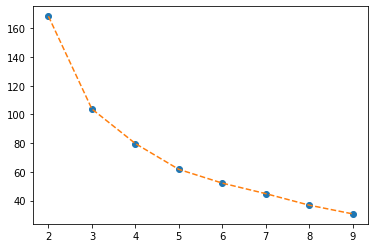

In [47]:
plt.plot(np.arange(2, 10), ins, 'o')
plt.plot(np.arange(2, 10), ins, '--')
plt.show()

In [50]:
# !pip install yellowbrick

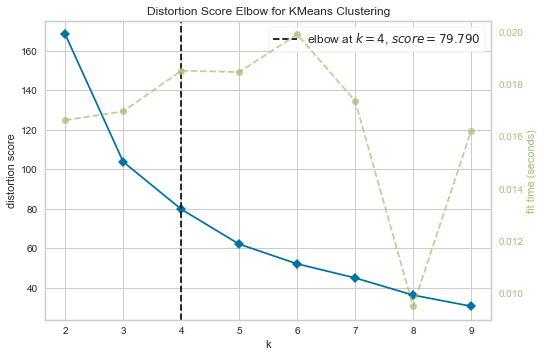

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
model = KMeans()
vs = KElbowVisualizer(model, k = (2, 10))
vs.fit(df)
vs.show()